# Данные

Мы пользуемся данными из прошлой лабораторной. Возьмём уже предобработанную таблицу и посмотрим на неё:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('data/combined.csv')
labels = pd.read_csv('data/labels.csv')


df.head()

,mid,player_0_kills,player_0_deaths,player_0_assists,player_0_winrate,player_0_gold,player_1_kills,player_1_deaths,player_1_assists,player_1_winrate,...,radiant_top_gold_4,radiant_sum_gold,dire_top_gold_0,dire_top_gold_1,dire_top_gold_2,dire_top_gold_3,dire_top_gold_4,dire_sum_gold,radiant_wr,dire_wr
0,0,9,3,18,0.453868,10960,13,3,18,0.494536,...,23825,87245,5035,10355,12285,13395,17550,58620,0.035146,0.035846
1,1,3,4,9,0.503400,12160,9,10,8,0.473653,...,19625,69310,19165,20275,21840,22305,24165,107750,0.027891,0.043353
2,2,5,13,7,0.494536,7990,6,11,5,0.516441,...,13845,54990,10635,13990,15760,20500,20735,81620,0.031233,0.029213
3,3,4,13,21,0.528383,9690,24,13,22,0.468132,...,19055,76685,13000,13280,20350,23505,24295,94430,0.028674,0.035620
4,4,8,2,10,0.515875,18605,18,4,9,0.447970,...,19675,78980,5560,6915,7770,7770,10965,38980,0.032880,0.034994


Тут *очень* много столбцов, давайте выкинем что-нибудь, например, оставим только признаки, на которых мы оучались в прошлой лабораторной:

In [3]:
from typing import List

selected_features = [
    'player_0_kills', 'player_1_kills', 'player_2_kills', 'player_3_kills', 'player_4_kills', # radiant kills
    'player_128_kills', 'player_129_kills', 'player_130_kills', 'player_131_kills', 'player_132_kills', # dire kills
    'radiant_wr', 'dire_wr', # winrates
    'radiant_sum_gold', 'dire_sum_gold' # golds
]

def select_features(df: pd.DataFrame, features: List[str]) -> pd.DataFrame:
    return df[features].copy()

X = select_features(df, selected_features)
y = labels['radiant_win']

X.head()

,player_0_kills,player_1_kills,player_2_kills,player_3_kills,player_4_kills,player_128_kills,player_129_kills,player_130_kills,player_131_kills,player_132_kills,radiant_wr,dire_wr,radiant_sum_gold,dire_sum_gold
0,9,13,0,8,20,5,4,4,1,1,0.035146,0.035846,87245,58620
1,3,9,5,12,6,2,8,14,16,10,0.027891,0.043353,69310,107750
2,5,6,10,0,1,13,5,17,7,6,0.031233,0.029213,54990,81620
3,4,24,17,2,17,13,18,7,5,20,0.028674,0.035620,76685,94430
4,8,18,1,1,9,4,3,4,4,1,0.032880,0.034994,78980,38980


Отлично, нам достаточно, поехали понижать размерность.

# Понижение размерности

## PCA

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)

%time X_pca = pca.fit_transform(X)

CPU times: user 485 ms, sys: 496 ms, total: 981 ms
Wall time: 150 ms


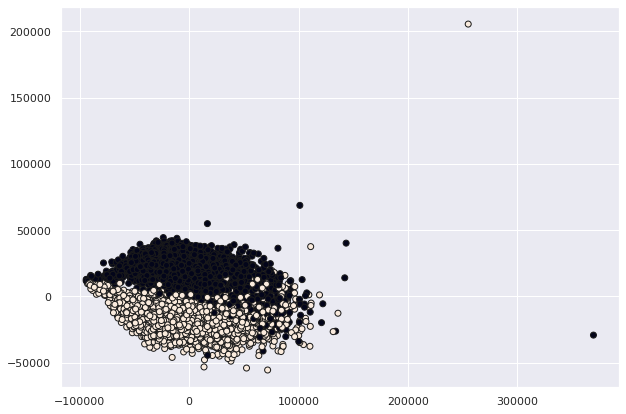

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.show()

## TSNE

In [7]:
from sklearn.manifold import TSNE

In [8]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=8)

%time X_tsne = tsne.fit_transform(X)

/home/covariance/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/covariance/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 19min 28s, sys: 13.9 s, total: 19min 42s
Wall time: 3min 15s


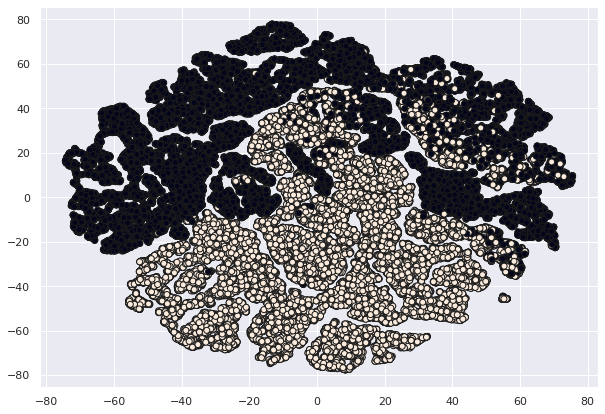

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='k')
plt.show()

После TSNE я мог кипятить чай на моём ноутбуке. 

Окей, какие-то результаты есть. Давайте теперь покластеризуем это.

# Кластеризация

In [10]:
from sklearn.cluster import KMeans as kmn

In [11]:
def split_by_cluster()

SyntaxError: invalid syntax (<ipython-input-11-e677a7e39731>, line 1)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

splitters = [
    (kmn(n_clusters=n), n) for n in [2, 4, 6, 8]
]

def print_cluster_distances(X, split, n_clusters):
    clusters = [X[split == cluster] for cluster in range(n_clusters)]
    
    print('Mean distances between classes:')
    outer = [[
            euclidean_distances(clusterA, clusterB).mean() for clusterB in clusters 
        ] for clusterA in clusters
    ]
    print(pd.DataFrame(outer))
    

def show_clusterization(X, splitter, n_clusters, name):
    split = splitter.fit_predict(X)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(X[:, 0], X[:, 1], c=split, edgecolor='k')
    ax2.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    fig.suptitle('Manifold %s, %d clusters' % (name, n_clusters))
    plt.show()
    print_cluster_distances(X, split, n_clusters)
    

for (splitter, clusters) in splitters:
    for (X, name) in [(X_pca, 'PCA'), (X_tsne, 'TSNE')]:
        show_clusterization(X, splitter, clusters, name)

# Выводы

Какие можно сделать выводы? Выбросы очень сильно выносят PCA вперёд ногами, в то время как TSNE делает достаточно хорошо. Кластеризация KMeans очень слабо согласуется с реальным разделением классов.